<a href="https://colab.research.google.com/github/tejeshvaish/8-languages-in-8-weeks/blob/master/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [29]:
from google.colab import files
uploaded = files.upload()


Saving  House_prediction.csv to  House_prediction (1).csv


In [32]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded[' House_prediction.csv']))
dataset.shape

(10692, 11)

In [0]:
dataset.describe()

In [0]:
dataset.plot(x='city', y='rent amount (R$)', style='o')  
plt.title('city vs rent amount')  
plt.xlabel('city')  
plt.ylabel('rent amount')  
plt.show()

In [0]:
dataset

In [0]:
df=dataset[:10000]
df
train =df

In [39]:
test=dataset[10000:]
test


,city,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10000,São Paulo,98,2,1,1,4,1028,3080,129,40,4277
10001,Belo Horizonte,50,2,1,1,1,300,1100,68,15,1483
10002,São Paulo,53,2,2,1,9,722,2100,0,27,2849
10003,São Paulo,32,1,1,0,1,400,1990,0,26,2416
10004,São Paulo,47,1,2,1,11,740,3200,150,41,4131
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,1585,12000,279,155,14020


In [0]:
X_test=test[['city','area','rooms','bathroom','parking spaces','floor','hoa (R$)','property tax (R$)','fire insurance (R$)','total (R$)']].values

In [99]:
y_test=test['rent amount (R$)']
y_test

10000     3080
10001     1100
10002     2100
10003     1990
10004     3200
         ...  
10687     1478
10688    15000
10689     6000
10690    12000
10691     1400
Name: rent amount (R$), Length: 692, dtype: int64

In [0]:
grouped =train.groupby(['city'])
l_grouped = list(grouped)
l_grouped

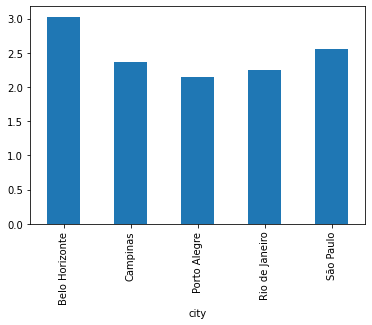

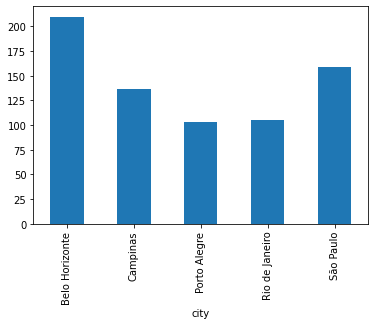

In [43]:
train.groupby("city")['area'].mean()
train.groupby("city")['area'].mean().plot(kind="bar")



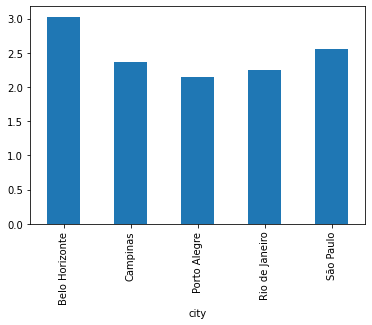

In [44]:
train.groupby("city")['rooms'].mean()
train.groupby("city")['rooms'].mean().plot(kind="bar")


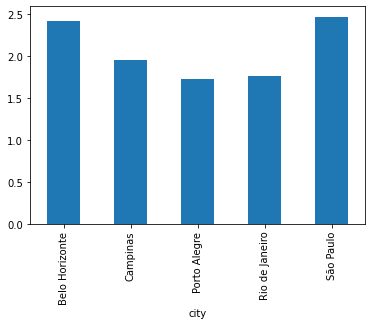

In [45]:
train.groupby("city")['bathroom'].mean()
train.groupby("city")['bathroom'].mean().plot(kind="bar")


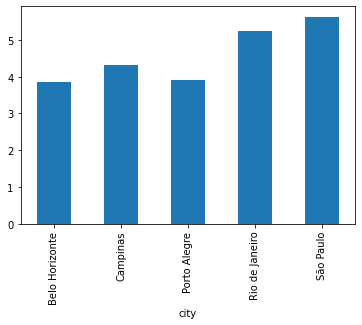

In [46]:
train.groupby("city")['floor'].mean()
train.groupby("city")['floor'].mean().plot(kind="bar")


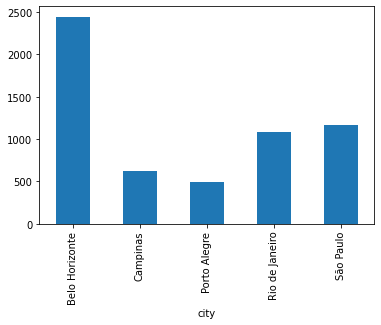

In [47]:
train.groupby("city")['hoa (R$)'].mean()
train.groupby("city")['hoa (R$)'].mean().plot(kind="bar")


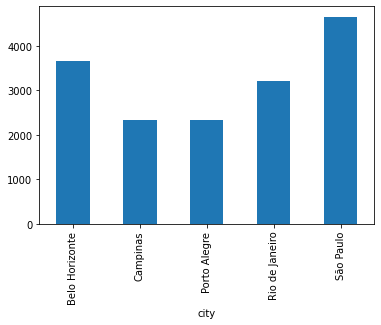

In [48]:
train.groupby("city")['rent amount (R$)'].mean()
train.groupby("city")['rent amount (R$)'].mean().plot(kind="bar")


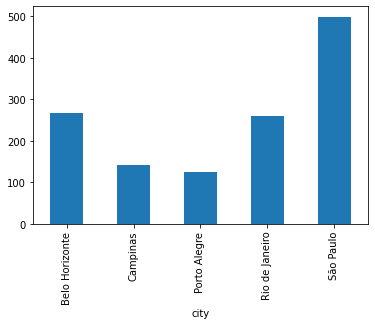

In [49]:
train.groupby("city")['property tax (R$)'].mean()
train.groupby("city")['property tax (R$)'].mean().plot(kind="bar")


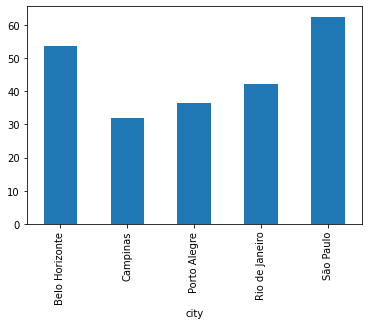

In [50]:
train.groupby("city")['fire insurance (R$)'].mean()
train.groupby("city")['fire insurance (R$)'].mean().plot(kind="bar")


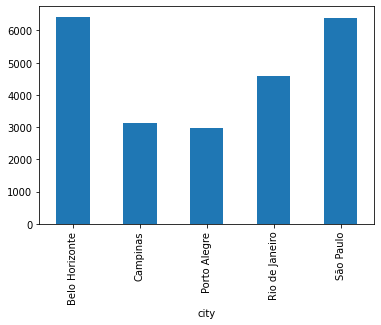

In [51]:
train.groupby("city")['total (R$)'].mean()
train.groupby("city")['total (R$)'].mean().plot(kind="bar")

In [81]:
X = train[['city','area','rooms','bathroom','parking spaces','floor','hoa (R$)','property tax (R$)','fire insurance (R$)','total (R$)']].values
X

array([[    4,    70,     2, ...,   211,    42,  5618],
       [    4,   320,     4, ...,  1750,    63,  7973],
       [    2,    80,     1, ...,     0,    41,  3841],
       ...,
       [    4,   550,     4, ...,  1917,   178, 19300],
       [    4,   384,     3, ...,  1050,   151, 11200],
       [    2,    48,     1, ...,    21,    11,  1032]])

In [75]:
y = dfle['rent amount (R$)'].values
y


array([ 3300,  4960,  2800, ..., 14000, 10000,   750])

In [76]:
dummies = pd.get_dummies(train.city)
dummies

,0,1,2,3,4
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
9995,1,0,0,0,0
9996,0,0,0,0,1
9997,0,0,0,0,1
9998,0,0,0,0,1


In [101]:
dummies1 = pd.get_dummies(test.city)
dummies

,0,1,2,3,4
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
9995,1,0,0,0,0
9996,0,0,0,0,1
9997,0,0,0,0,1
9998,0,0,0,0,1


In [77]:
df_dummies= pd.concat([train,dummies],axis='columns')
df_dummies

,city,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),0,1,2,3,4
0,4,70,2,1,1,7,2065,3300,211,42,5618,0,0,0,0,1
1,4,320,4,4,0,20,1200,4960,1750,63,7973,0,0,0,0,1
2,2,80,1,1,1,6,1000,2800,0,41,3841,0,0,1,0,0
3,2,51,2,1,0,2,270,1112,22,17,1421,0,0,1,0,0
4,4,25,1,1,0,1,0,800,25,11,836,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,386,3,4,8,0,0,6500,730,107,7337,1,0,0,0,0
9996,4,19,1,1,0,0,0,1200,41,16,1257,0,0,0,0,1
9997,4,550,4,6,4,1,3200,14000,1917,178,19300,0,0,0,0,1
9998,4,384,3,5,3,0,0,10000,1050,151,11200,0,0,0,0,1


In [103]:
df_dummies1= pd.concat([test,dummies1],axis='columns')
df_dummies1

,city,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
10000,São Paulo,98,2,1,1,4,1028,3080,129,40,4277,0,0,0,0,1
10001,Belo Horizonte,50,2,1,1,1,300,1100,68,15,1483,1,0,0,0,0
10002,São Paulo,53,2,2,1,9,722,2100,0,27,2849,0,0,0,0,1
10003,São Paulo,32,1,1,0,1,400,1990,0,26,2416,0,0,0,0,1
10004,São Paulo,47,1,2,1,11,740,3200,150,41,4131,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,402,1478,24,22,1926,0,0,1,0,0
10688,São Paulo,285,4,4,4,17,3100,15000,973,191,19260,0,0,0,0,1
10689,Rio de Janeiro,70,3,3,0,8,980,6000,332,78,7390,0,0,0,1,0
10690,Rio de Janeiro,120,2,2,2,8,1585,12000,279,155,14020,0,0,0,1,0


In [82]:
df_dummies.drop('city',axis='columns',inplace=True)
df_dummies

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),0,1,2,3,4
0,70,2,1,1,7,2065,3300,211,42,5618,0,0,0,0,1
1,320,4,4,0,20,1200,4960,1750,63,7973,0,0,0,0,1
2,80,1,1,1,6,1000,2800,0,41,3841,0,0,1,0,0
3,51,2,1,0,2,270,1112,22,17,1421,0,0,1,0,0
4,25,1,1,0,1,0,800,25,11,836,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,386,3,4,8,0,0,6500,730,107,7337,1,0,0,0,0
9996,19,1,1,0,0,0,1200,41,16,1257,0,0,0,0,1
9997,550,4,6,4,1,3200,14000,1917,178,19300,0,0,0,0,1
9998,384,3,5,3,0,0,10000,1050,151,11200,0,0,0,0,1


In [104]:
df_dummies1.drop('city',axis='columns',inplace=True)
df_dummies1

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
10000,98,2,1,1,4,1028,3080,129,40,4277,0,0,0,0,1
10001,50,2,1,1,1,300,1100,68,15,1483,1,0,0,0,0
10002,53,2,2,1,9,722,2100,0,27,2849,0,0,0,0,1
10003,32,1,1,0,1,400,1990,0,26,2416,0,0,0,0,1
10004,47,1,2,1,11,740,3200,150,41,4131,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,63,2,1,1,5,402,1478,24,22,1926,0,0,1,0,0
10688,285,4,4,4,17,3100,15000,973,191,19260,0,0,0,0,1
10689,70,3,3,0,8,980,6000,332,78,7390,0,0,0,1,0
10690,120,2,2,2,8,1585,12000,279,155,14020,0,0,0,1,0


In [0]:

X = df_dummies.drop('rent amount (R$)',axis='columns')
y = df_dummies['rent amount (R$)']



In [0]:
X_test = df_dummies1.drop('rent amount (R$)',axis='columns')
y_test = df_dummies1['rent amount (R$)']

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
X


,area,rooms,bathroom,parking spaces,floor,hoa (R$),property tax (R$),fire insurance (R$),total (R$),0,1,2,3,4
0,70,2,1,1,7,2065,211,42,5618,0,0,0,0,1
1,320,4,4,0,20,1200,1750,63,7973,0,0,0,0,1
2,80,1,1,1,6,1000,0,41,3841,0,0,1,0,0
3,51,2,1,0,2,270,22,17,1421,0,0,1,0,0
4,25,1,1,0,1,0,25,11,836,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,386,3,4,8,0,0,730,107,7337,1,0,0,0,0
9996,19,1,1,0,0,0,41,16,1257,0,0,0,0,1
9997,550,4,6,4,1,3200,1917,178,19300,0,0,0,0,1
9998,384,3,5,3,0,0,1050,151,11200,0,0,0,0,1


In [89]:
model.predict(X)

array([ 3299.6514582 ,  4960.00550966,  2799.89977808, ...,
       14004.22713195,  9998.7106001 ,   749.9557963 ])

In [90]:
model.score(X,y)


0.9999965658609445

In [91]:
model.predict([[340,3,2,1,5,200,100.,20,3000,0,0,0,0,1]])

array([2679.71737089])

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [95]:
regressor = LinearRegression()  
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
area,-0.000027
rooms,0.059042
bathroom,-0.038443
parking spaces,0.009371
floor,0.016783
hoa (R$),-0.999979
property tax (R$),-0.999811
fire insurance (R$),-0.992607
total (R$),0.999882
0,-0.221146


In [110]:
y_pred = regressor.predict(X_test)
y_pred

array([ 3079.70652528,  1099.6669418 ,  2099.79495076,  1989.6682118 ,
        3199.75039374,  1439.78916471,  3957.66625475,  3949.91022025,
        1099.74629397,  1200.12385344,  5499.53157447, 11503.36496108,
        3699.88961506,  1999.94092221,  3999.87691791,  4999.93073351,
        2799.72475119,   999.6982992 ,  2300.07387844,  1300.03516357,
        5439.62928827,  7610.80569062,  1600.03928484,  1149.80556823,
        1899.95751028,  1049.71933389,  1019.63137301,  8449.7467227 ,
         719.9783487 ,  1500.0088251 ,  2199.66911643,  2399.68957445,
        4909.42702683,  3399.78600271,  3296.79270426,  5999.86243519,
        9236.8182303 ,  2749.7832256 ,  6496.52436874,  2110.00259574,
        3999.80547582,  2350.05199317,  3799.58381139,  7999.72284761,
        4699.69274835,  4699.84417636,  3399.6422448 ,  1799.80382841,
        3260.08287997, 11001.35318401,  5995.20716133,  8398.64793283,
        2999.94781631,   919.72908313,   999.73038524,  3519.89601104,
      

In [117]:
y_test

10000     3080
10001     1100
10002     2100
10003     1990
10004     3200
         ...  
10687     1478
10688    15000
10689     6000
10690    12000
10691     1400
Name: rent amount (R$), Length: 692, dtype: int64

In [119]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1=df.head(20)
df1

,Actual,Predicted
10000,3080,3079.706525
10001,1100,1099.666942
10002,2100,2099.794951
10003,1990,1989.668212
10004,3200,3199.750394
10005,1440,1439.789165
10006,3958,3957.666255
10007,3950,3949.910220
10008,1100,1099.746294
10009,1200,1200.123853


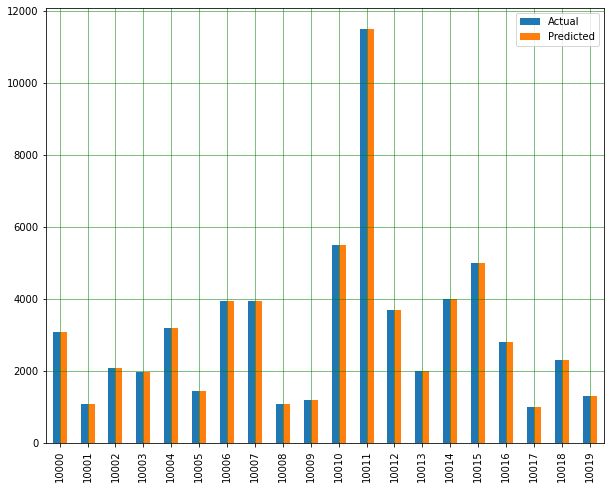

In [116]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [120]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5022630688388354
Mean Squared Error: 1.1644478912095844
Root Mean Squared Error: 1.079095867478689


In [70]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = ohe.fit_transform(X).toarray()
X


array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [72]:
X = X[:,1:]
X.shape

(10000, 18307)

In [71]:
model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
model.predict([[0,1,3400]]) 

ValueError: ignored